In [488]:
import numpy as np
import pandas as pd
import os
import glob
from matplotlib import pyplot as plt
from itertools import cycle

Task 1

In [489]:

df1 = pd.read_csv('data/ERCOT_DA_Prices_2016.csv')
df2 = pd.read_csv('data/ERCOT_DA_Prices_2017.csv')
df3 = pd.read_csv('data/ERCOT_DA_Prices_2018.csv')
df4 = pd.read_csv('data/ERCOT_DA_Prices_2019.csv')
df = pd.concat([df1, df2, df3, df4],ignore_index=True)

In [490]:
df

,Date,SettlementPoint,Price
0,2016-01-01 00:00:00,HB_BUSAVG,18.42
1,2016-01-01 00:00:00,HB_HOUSTON,18.42
2,2016-01-01 00:00:00,HB_HUBAVG,18.42
3,2016-01-01 00:00:00,HB_NORTH,18.43
4,2016-01-01 00:00:00,HB_SOUTH,18.38
...,...,...,...
497315,2019-12-31 23:00:00,LZ_LCRA,14.53
497316,2019-12-31 23:00:00,LZ_NORTH,14.48
497317,2019-12-31 23:00:00,LZ_RAYBN,14.48
497318,2019-12-31 23:00:00,LZ_SOUTH,14.70


Task 2 & 3

In [491]:
df['month'] = pd.to_datetime(df['Date']).dt.month
df['year'] = pd.to_datetime(df['Date']).dt.year

In [492]:
output = df.groupby(['SettlementPoint','year','month'],as_index=False).mean()

In [493]:
output

,SettlementPoint,year,month,Price
0,HB_BUSAVG,2016,1,19.209301
1,HB_BUSAVG,2016,2,15.288247
2,HB_BUSAVG,2016,3,16.755626
3,HB_BUSAVG,2016,4,18.289347
4,HB_BUSAVG,2016,5,18.159583
...,...,...,...,...
676,LZ_WEST,2019,8,128.876465
677,LZ_WEST,2019,9,83.471139
678,LZ_WEST,2019,10,49.383360
679,LZ_WEST,2019,11,49.340847


In [494]:
output.to_csv ('AveragePriceByMonth.csv', index = None, header=True) 

Task 4

In [495]:
df['hour'] = pd.to_datetime(df['Date']).dt.hour

In [496]:
df

,Date,SettlementPoint,Price,month,year,hour
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,1,2016,0
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,1,2016,0
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,1,2016,0
3,2016-01-01 00:00:00,HB_NORTH,18.43,1,2016,0
4,2016-01-01 00:00:00,HB_SOUTH,18.38,1,2016,0
...,...,...,...,...,...,...
497315,2019-12-31 23:00:00,LZ_LCRA,14.53,12,2019,23
497316,2019-12-31 23:00:00,LZ_NORTH,14.48,12,2019,23
497317,2019-12-31 23:00:00,LZ_RAYBN,14.48,12,2019,23
497318,2019-12-31 23:00:00,LZ_SOUTH,14.70,12,2019,23


In [497]:
# Drop all price <= 0
df = df[df['Price'] >= 0]

In [498]:
df

,Date,SettlementPoint,Price,month,year,hour
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,1,2016,0
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,1,2016,0
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,1,2016,0
3,2016-01-01 00:00:00,HB_NORTH,18.43,1,2016,0
4,2016-01-01 00:00:00,HB_SOUTH,18.38,1,2016,0
...,...,...,...,...,...,...
497315,2019-12-31 23:00:00,LZ_LCRA,14.53,12,2019,23
497316,2019-12-31 23:00:00,LZ_NORTH,14.48,12,2019,23
497317,2019-12-31 23:00:00,LZ_RAYBN,14.48,12,2019,23
497318,2019-12-31 23:00:00,LZ_SOUTH,14.70,12,2019,23


In [499]:
# df.assign(logret=np.log(df.Price).groupby(df.SettlementPoint).diff())
df["HourlyVolatility"] = df.groupby("SettlementPoint")['Price'].apply(lambda x: np.log(x.shift()) - np.log(x))

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-499-abb694cba5b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HourlyVolatility"] = df.groupby("SettlementPoint")['Price'].apply(lambda x: np.log(x.shift()) - np.log(x))


In [500]:
df.dropna()

,Date,SettlementPoint,Price,month,year,hour,HourlyVolatility
14,2016-01-01 01:00:00,HB_BUSAVG,16.15,1,2016,1,0.131517
15,2016-01-01 01:00:00,HB_HOUSTON,16.15,1,2016,1,0.131517
16,2016-01-01 01:00:00,HB_HUBAVG,16.14,1,2016,1,0.132136
17,2016-01-01 01:00:00,HB_NORTH,16.17,1,2016,1,0.130822
18,2016-01-01 01:00:00,HB_SOUTH,16.09,1,2016,1,0.133065
...,...,...,...,...,...,...,...
497315,2019-12-31 23:00:00,LZ_LCRA,14.53,12,2019,23,0.054900
497316,2019-12-31 23:00:00,LZ_NORTH,14.48,12,2019,23,0.051155
497317,2019-12-31 23:00:00,LZ_RAYBN,14.48,12,2019,23,0.051155
497318,2019-12-31 23:00:00,LZ_SOUTH,14.70,12,2019,23,0.057498


In [501]:
output2 = df.groupby(['SettlementPoint','year'],as_index=False).std()

In [502]:
output3 = output2.drop(columns=['month', 'hour','Price'])

Task 5

In [503]:
output3.to_csv ('HourlyVolatilityByYear.csv', index = None, header=True) 

Task 6

In [507]:
idx = output2.groupby(['year'])['HourlyVolatility'].transform(max) == output2['HourlyVolatility']

In [508]:
output4 = output2[idx].drop(columns=['month', 'hour','Price'])

In [509]:
output4.to_csv ('MaxVolatilityByYear.csv', index = None, header=True) 

Task 7

In [510]:
sp = df.SettlementPoint.unique()

In [511]:
sp

array(['HB_BUSAVG', 'HB_HOUSTON', 'HB_HUBAVG', 'HB_NORTH', 'HB_SOUTH',
       'HB_WEST', 'LZ_AEN', 'LZ_CPS', 'LZ_HOUSTON', 'LZ_LCRA', 'LZ_NORTH',
       'LZ_RAYBN', 'LZ_SOUTH', 'LZ_WEST', 'HB_PAN'], dtype=object)

In [512]:
for settlementPoint in sp:
    df_new = df[df['SettlementPoint'] == settlePoint]
    df_new['date'] = pd.to_datetime(df['Date']).dt.date
    df_new['hour'] = pd.to_datetime(df['Date']).dt.hour
    output5 = df_new.pivot(index="date", columns="hour", values="Price")
    output5.reset_index(inplace=True)
    output5.insert(0,'variable',settlementPoint)
    output5.columns = ['Variable', 'Date', 'X1', 'X2', 'X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24']
    output5.to_csv ('formattedSpotHistory/spot_'+settlementPoint+'.csv', index = None, header=True) 
    

<ipython-input-512-cc252b25a126>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['date'] = pd.to_datetime(df['Date']).dt.date
<ipython-input-512-cc252b25a126>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['hour'] = pd.to_datetime(df['Date']).dt.hour


Bonus - Volatility Plots

In [513]:
df_plt = pd.read_csv('HourlyVolatilityByYear.csv')

In [514]:
df_plt

,SettlementPoint,year,HourlyVolatility
0,HB_BUSAVG,2016,0.185773
1,HB_BUSAVG,2017,0.154085
2,HB_BUSAVG,2018,0.200258
3,HB_BUSAVG,2019,0.249364
4,HB_HOUSTON,2016,0.191099
5,HB_HOUSTON,2017,0.170469
6,HB_HOUSTON,2018,0.200246
7,HB_HOUSTON,2019,0.247932
8,HB_HUBAVG,2016,0.187957
9,HB_HUBAVG,2017,0.158680


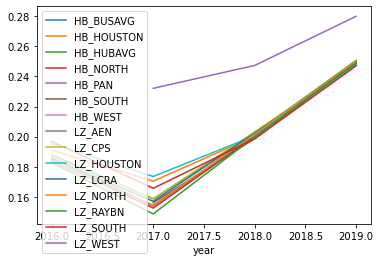

In [522]:
fig, ax = plt.subplots()
for label, grp in df_plt.groupby('SettlementPoint'):
    grp.plot(x = 'year', y = 'HourlyVolatility',ax = ax, label = label)
plt.savefig('output/VolatilityPlots.png')

Bonus - Mean plots

So far I am trying to create the date column to keep track of the chronological order. For some of the spots there seems to be missing data from certain year so I cannot fill the column with repeated pattern - still trying to figure that out but it takes longer than I thought. Once I have the date column, I'll split the data into HB and LZ and plot like the way I plot the volatility data above.

In [523]:
df_plt2 = pd.read_csv('AveragePriceByMonth.csv')

In [525]:
df_HB = df_plt2[df_plt2['SettlementPoint'].str.contains("HB")]
df_LZ = df_plt2[df_plt2['SettlementPoint'].str.contains("LZ")]

In [433]:
df_LZ

,SettlementPoint,year,month,Price,datetime
297,LZ_AEN,2016,1,19.324664,2016-10-31
298,LZ_AEN,2016,2,15.448290,2016-11-30
299,LZ_AEN,2016,3,16.855074,2016-12-31
300,LZ_AEN,2016,4,18.256069,2017-01-31
301,LZ_AEN,2016,5,18.124906,2017-02-28
...,...,...,...,...,...
676,LZ_WEST,2019,8,128.876465,2016-05-31
677,LZ_WEST,2019,9,83.471139,2016-06-30
678,LZ_WEST,2019,10,49.383360,2016-07-31
679,LZ_WEST,2019,11,49.340847,2016-08-31


Bonus – Hourly Shape Profile Computation

** This one was done in a hurry but basically I would like to use the profile from task 7 and normalize it by adding the price for each day together and divide each hour by the total. The excel seems not to generate the right answer but this is my thought process.

In [529]:
for settlementPoint in sp:
    df_new1 = df[df['SettlementPoint'] == settlePoint]
    df_new1['date'] = pd.to_datetime(df['Date']).dt.date
    df_new1['hour'] = pd.to_datetime(df['Date']).dt.hour
    output6 = df_new1.pivot(index="date", columns="hour", values="Price")
    output6['temp'] = df.sum(axis=1)
    output6.div(output6.sum(axis=1), axis=0)
    output6 = output6.drop(columns=['temp'])
    output6.reset_index(inplace=True)
    output6.insert(0,'variable',settlementPoint)
    output6.columns = ['Variable', 'Date', 'X1', 'X2', 'X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24']
    output6.to_csv ('hourlyShapeProfiles/profile_'+settlementPoint+'.csv', index = None, header=True) 
    

<ipython-input-529-10a3455bbb3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['date'] = pd.to_datetime(df['Date']).dt.date
<ipython-input-529-10a3455bbb3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['hour'] = pd.to_datetime(df['Date']).dt.hour
